# Zonal Wind Stress

Mean zonal wind stress profile from different experiments.

**Requirements:** The `conda/analysis3-20.01` (or later) module on the VDI (or your own up-to-date cookbook installation).

## Theory

Wind stress, $\tau$, transfers momentum from the atmosphere to the ocean.

## Calculation

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import cosima_cookbook as cc
import matplotlib.pyplot as plt
from dask.distributed import Client

In [2]:
client = Client(n_workers=8)
client

Client Scheduler: tcp://127.0.0.1:39835 Dashboard: /proxy/8787/status,Cluster Workers: 24 Cores: 48 Memory: 202.49 GB


In [3]:
session = cc.database.create_session()
start_time='1950-01-01'

The following code block shows the zonal- and time-averaged wind stress forcing for each experiment.

In [4]:
def calc_mean_tau_x(expt):
    
    tau_x = cc.querying.getvar(expt, 'tau_x', session, start_time=start_time)

    mean_tau_x = tau_x.mean('xu_ocean').mean('time')
    mean_tau_x = mean_tau_x.compute()
    mean_tau_x.name = expt
    
    return mean_tau_x

In [5]:
expts = ['01deg_jra55v13_ryf9091', '01deg_jra55_SAMextr_1011_from9091']

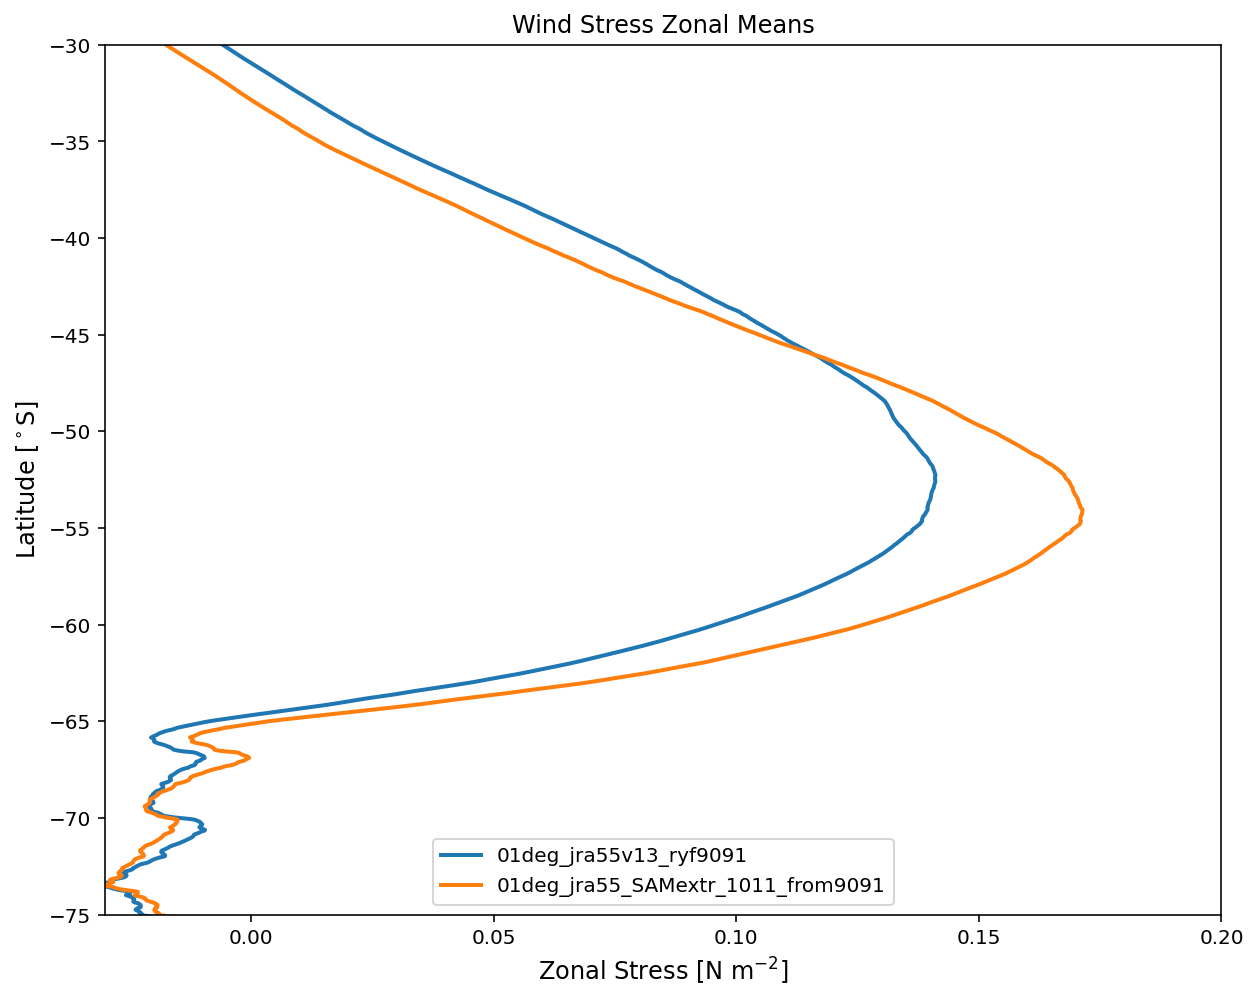

In [7]:
plt.figure(figsize=(10,8))

for expt in expts:
    mean_tau_x = calc_mean_tau_x(expt)
    plt.plot(mean_tau_x, mean_tau_x.yu_ocean,
             linewidth=2, label=expt)

plt.ylim([-75, -30])
plt.xlim([-0.03, 0.2])
plt.ylabel('Latitude [$^\circ$S]', fontsize=12)
plt.xlabel('Zonal Stress [N m$^{-2}$]', fontsize=12)
plt.legend(loc=8, fontsize=10)
plt.title('Wind Stress Zonal Means');

### Note
Operation `.mean(dim='xu_ocean')` is not correct, in particular for regions north of 65N where the model uses the tripolar. The example here focusses in the Southern Hemisphere and thus we can get away by simply `.mean(dim='xu_ocean')`.